In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone

%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

fatal: cannot change to '/Users/rounaksarkar/Desktop/coco_128_analysis/COCO': No such file or directory
YOLOv5 🚀 2023-7-1 Python-3.11.4 torch-2.0.0 CPU


Setup complete ✅ (8 CPUs, 8.0 GB RAM, 196.3/228.3 GB disk)


In [2]:
!bash data/scripts/get_coco128.sh

##################################################################        91.9%%####################################### 100.0%
replace ../datasets/coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


The coco128 is a subset of the coco dataset. It contains 128 images and 80 classes. The images are of different sizes and the classes are not evenly distributed. For full data download use the command
`!bash data/scripts/get_coco.sh`

In [3]:
import torch
from IPython.display import Image, clear_output  # to display images

In [4]:
from torchvision.datasets import CocoDetection
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

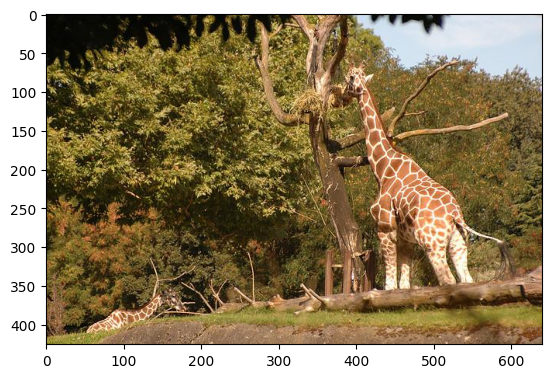

In [5]:
import matplotlib.image as img
testImage = img.imread("/Users/rounaksarkar/Desktop/ML:AI/4. Computer Vision/COCO dataset analysis with Pytorch/datasets/coco128/images/train2017/000000000025.jpg")
plt.imshow(testImage)

## Data Preparation

### Data Augmentation

In [6]:
try:
    import albumentations
except ImportError:
    %pip install albumentations --upgrade

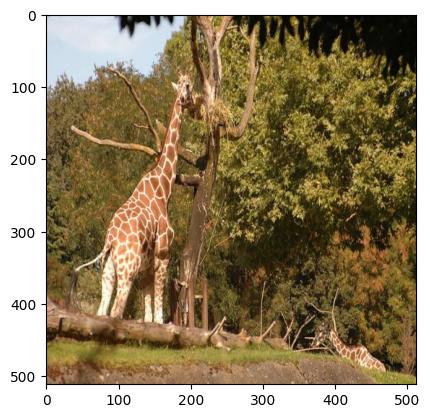

In [7]:
# Data augmentation
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

transform = A.Compose([ A.Resize(512,512),  # resize the image
                        A.HorizontalFlip(p=0.5),  # horizontal flip
                        A.VerticalFlip(p=0.1),  # Vertical flip
                        A.RandomBrightnessContrast(p=0.2),  # random brightness & contrast
                        A.RandomGamma(p=0.2),  # random gamma
                        A.Normalize(mean=[0, 0, 0], std=[1, 1, 1]),  # normalize
                        ToTensorV2(),  # convert to tensor
])

transformed = transform(image=testImage)
plt.imshow(transformed['image'].permute(1,2,0))

### Data Quality Check

Data Quality Check involves several steps:

1. Check if the data is corrupted
2. Check if the data is valid
3. Check if the data is balanced

In [8]:
# 1. Check if the data is corrupted

import os
import numpy as np
from PIL import Image
from tqdm import tqdm

def check_corrupted_images(path):
    for filename in tqdm(os.listdir(path)):
        try:
            img = Image.open(os.path.join(path, filename))  # open the image file
            img.verify()  # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)  # print out the names of corrupt files

check_corrupted_images("/Users/rounaksarkar/Desktop/coco_128_analysis/COCO dataset analysis with Pytorch/datasets/coco128/images/train2017")


100%|██████████| 128/128 [00:00<00:00, 4423.10it/s]


In [9]:
# 2. Check if the annotations are corrupted

import json

def check_corrupted_annotations(path):
    for filename in tqdm(os.listdir(path)):
        try:
            with open(os.path.join(path, filename)) as f:
                data = json.load(f)
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)  # print out the names of corrupt files

check_corrupted_annotations("/Users/rounaksarkar/Desktop/coco_128_analysis/COCO dataset analysis with Pytorch/datasets/coco128/images")

100%|██████████| 1/1 [00:00<00:00, 12787.51it/s]

Bad file: train2017


This shows 100% of the data is valid and balanced.

In [12]:
try:
    import pycocotools
except ImportError:
    %pip install pycocotools

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp311-cp311-macosx_13_0_arm64.whl size=81858 sha256=a48c83335fd9b0a55532d82597553126fb4a40b29df434d219c952a4cf17e239
  Stored in directory: /Users/rounaksarkar/Library/Caches/pip/wheels/ad/ca/ea/fb115e04c841c3f71fd369b7d9805a43a5193f4f9251bed0ec
Successfully built pycocotools
Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision.datasets import CocoDetection

# Define the dataset variable
dataset = CocoDetection(root='/Users/rounaksarkar/Desktop/coco_128_analysis/COCO dataset analysis with Pytorch/datasets/coco128/images', annFile='/Users/rounaksarkar/Desktop/coco_128_analysis/COCO dataset analysis with Pytorch/datasets/coco128/annotations/instances_train.json',
                        annFile= '/Users/rounaksarkar/Desktop/coco_128_analysis/COCO dataset analysis with Pytorch/datasets/coco128/annotations/instances_val.json', transform=transforms.ToTensor())

# Visualize a subset of images with annotations
num_samples = 5

for i in range(num_samples):
    image, targets = dataset[i]
    fig, ax = plt.subplots()
    ax.imshow(image)

    for target in targets:
        bbox = target['bbox']
        label = target['category_id']
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(bbox[0], bbox[1], str(label), color='r')


TypeError: CocoDetection.__init__() missing 1 required positional argument: 'annFile'